In [25]:
!pip install plotly cufflinks chart-studio hyperopt --upgrade -q

You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)

from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from lightgbm import LGBMRegressor
import lightgbm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")


In [27]:
%time
train_df = pd.read_csv('../input/predicting-molecular-properties/train.csv')
test_df = pd.read_csv('../input/predicting-molecular-properties/test.csv')
stuctures_df = pd.read_csv('../input/predicting-molecular-properties/structures.csv')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


In [30]:
train_df.shape, test_df.shape, stuctures_df.shape

((4658147, 6), (2505542, 5), (2358657, 6))

Text(0, 0.5, 'Probability')

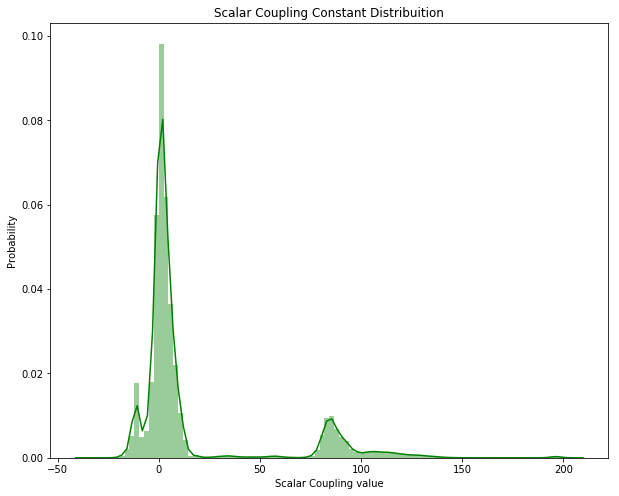

In [46]:
fig, ax = plt.subplots(figsize=(10, 8)) 
sns.distplot(train_df['scalar_coupling_constant'], kde=True, hist=True, bins=100, color='g', ax=ax)
ax.set_title('Scalar Coupling Constant Distribuition')
ax.set_xlabel('Scalar Coupling value')
ax.set_ylabel('Probability')